In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# UploadTransactionData

In [22]:
df_txn = pd.read_csv("/content/drive/MyDrive/IS/data/combine3.csv")
df_txn.info()
df_txn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14007 entries, 0 to 14006
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       14007 non-null  object 
 1   TxHash           14006 non-null  object 
 2   BlockHeight      14006 non-null  float64
 3   TimeStamp        14006 non-null  float64
 4   From             14006 non-null  object 
 5   To               13993 non-null  object 
 6   Value            14006 non-null  float64
 7   ContractAddress  13 non-null     object 
 8   Input            13620 non-null  object 
 9   isError          14006 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.1+ MB


,Unnamed: 0,TxHash,BlockHeight,TimeStamp,From,To,Value,ContractAddress,Input,isError
0,0,0xa0ab289ce60a48899608f7e8e19e9c453a177dbf1717...,5115561.0,1.519000e+09,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x008edecdaab6007f524140c7e5313c69b8f1fe66,1.994000,NaN,0x,0.0
1,1,0xe314ddfdb06dc291a83b36e0380ceb16ca00cdd0b0bc...,5118858.0,1.519047e+09,0x008edecdaab6007f524140c7e5313c69b8f1fe66,0x8d5a9460dc761b45ebd2ce21ffccb41c4485267f,1.990000,NaN,0x,0.0
2,2,0x4380e11afa0bb20ddf4e4d47f4f11bd22fb9eb9a4ef7...,5197136.0,1.520200e+09,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x008edecdaab6007f524140c7e5313c69b8f1fe66,0.062758,NaN,0x,0.0
3,3,0xc12213d28647b38f4a8a949a261a715dc9ef0d6b8b7a...,5197144.0,1.520200e+09,0x008edecdaab6007f524140c7e5313c69b8f1fe66,0xf230b790e05390fc8295f4d3f60332c93bed42e2,0.000000,NaN,0xa9059cbb0000000000000000000000008d5a9460dc76...,0.0
4,4,0x79e8208a21c4a2415e5df654212937a59095f70a5720...,5197257.0,1.520201e+09,0x008edecdaab6007f524140c7e5313c69b8f1fe66,0xf230b790e05390fc8295f4d3f60332c93bed42e2,0.000000,NaN,0xa9059cbb0000000000000000000000008d5a9460dc76...,0.0


In [23]:
df_txn_prepared = df_txn.loc[df_txn['isError'] == 0]

df_txn_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13538 entries, 0 to 14005
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       13538 non-null  object 
 1   TxHash           13538 non-null  object 
 2   BlockHeight      13538 non-null  float64
 3   TimeStamp        13538 non-null  float64
 4   From             13538 non-null  object 
 5   To               13525 non-null  object 
 6   Value            13538 non-null  float64
 7   ContractAddress  13 non-null     object 
 8   Input            13152 non-null  object 
 9   isError          13538 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.1+ MB


In [24]:
df_txn_prepared = df_txn_prepared.drop(columns = ['BlockHeight','Unnamed: 0','ContractAddress','Input','isError'])

df_txn_prepared.info()
df_txn_prepared.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13538 entries, 0 to 14005
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TxHash     13538 non-null  object 
 1   TimeStamp  13538 non-null  float64
 2   From       13538 non-null  object 
 3   To         13525 non-null  object 
 4   Value      13538 non-null  float64
dtypes: float64(2), object(3)
memory usage: 634.6+ KB


,TxHash,TimeStamp,From,To,Value
0,0xa0ab289ce60a48899608f7e8e19e9c453a177dbf1717...,1.519000e+09,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x008edecdaab6007f524140c7e5313c69b8f1fe66,1.994000
1,0xe314ddfdb06dc291a83b36e0380ceb16ca00cdd0b0bc...,1.519047e+09,0x008edecdaab6007f524140c7e5313c69b8f1fe66,0x8d5a9460dc761b45ebd2ce21ffccb41c4485267f,1.990000
2,0x4380e11afa0bb20ddf4e4d47f4f11bd22fb9eb9a4ef7...,1.520200e+09,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x008edecdaab6007f524140c7e5313c69b8f1fe66,0.062758
3,0xc12213d28647b38f4a8a949a261a715dc9ef0d6b8b7a...,1.520200e+09,0x008edecdaab6007f524140c7e5313c69b8f1fe66,0xf230b790e05390fc8295f4d3f60332c93bed42e2,0.000000
4,0x79e8208a21c4a2415e5df654212937a59095f70a5720...,1.520201e+09,0x008edecdaab6007f524140c7e5313c69b8f1fe66,0xf230b790e05390fc8295f4d3f60332c93bed42e2,0.000000


In [25]:
df_txn_prepared = df_txn_prepared.dropna()

df_txn_prepared.info()
len(df_txn_prepared)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13525 entries, 0 to 14005
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TxHash     13525 non-null  object 
 1   TimeStamp  13525 non-null  float64
 2   From       13525 non-null  object 
 3   To         13525 non-null  object 
 4   Value      13525 non-null  float64
dtypes: float64(2), object(3)
memory usage: 634.0+ KB


13525

In [ ]:
#For test to CytoscapeGraph
'''
df_txn_prepared = df_txn_prepared.iloc[:100]
df_txn_prepared.head()
'''

,TxHash,BlockHeight,TimeStamp,From,To,Value
0,0xaca3850ba0080cf47b47f80e46da452f61bcbb5470d3...,5848095.0,1.529874e+09,0x16f209b5332a1b4fa5bf19497ca40154c5db2f85,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.500000
1,0x95681862f9778e49caecf603dd911d6ed57f7799d89d...,5848181.0,1.529875e+09,0xe7e07e44ee315b5f2d076340b2b7a5cc9a4ee57b,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.001020
2,0x716ae3961b50186a0bbc272cfcc4555662f7fe33550f...,5848716.0,1.529883e+09,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0xe892875b87b94c44edf0e91ee9f49d0525fadd83,0.500390
3,0xf397197b800d6cc055a4db265b5e9df3dd2aa745c813...,5849038.0,1.529888e+09,0x0681d8db095565fe8a346fa0277bffde9c0edbbf,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.817800
4,0x7f8086011a32f128dba57fe06fc5f4a181d2f5401e5a...,5849437.0,1.529893e+09,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0xe892875b87b94c44edf0e91ee9f49d0525fadd83,0.817506


In [26]:
locat1 = '/content/drive/MyDrive/IS/data/txn3_cleaned.csv'

df_txn_prepared.to_csv(locat1)
files.download(locat1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Create scam parameter

In [15]:
scam = pd.read_csv(f"/content/drive/MyDrive/IS/spider/scamid.txt")
scam.info()
scam.head()
print(len(scam))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   scam_id  2343 non-null   object
dtypes: object(1)
memory usage: 18.4+ KB
2343


In [16]:
ls_scam = scam['scam_id'].values.tolist()

print(ls_scam)

['0x944a3f5641d6faf7a6abde4ec31e40d0929955ed', '0x0c9d1b3ca852c67bbeabeeb51e9482a845d56868', '0xc6df8e498facad626a82b7af3c9f5f9301e79fd6', '0x905475cbca398e8fee6e35bcb2f530a3474b78ce', '0x379ce20c018fb6301c1872c429ec7270ffa4dc5b', '0x93d8d5bb1f1e4822f3c614d9a09e7c5e3fabc13a', '0xa6E71Bdc40952eb1C083E5Ae4940d70886296724', '0x3a878eddb991ebcbc7c8052055b2e5ed5d0d1ba4', '0x9eea7fda3c78cd8c096ae229de8217a94cd1bcfe', '0xdfa8e0d144b1bd7b9f08cd05a7726cc20121292f', '0x8d4426f94e42f721c7116e81d6688cd935cb3b4f', '0x5e1f89284b8283edcd082901b78c7589f39d5b51', '0x0f4cf489c65f5001843c525e1f374768dcad9b99', '0xe949A4c861089fBdE6eF1175C23E1485D5970567', '0xb48c99C37b7cf4AC0A1c2dcA518782C1FEB4f066', '0xb0608ca76d2ec6984f652829e887811516e4b846', '0x29c3aDF6f50E2186C21f5Ebb1aC073115831286E', '0xe7cc576611c2df800862db667140a90cf9ec4b72', '0xdbbC7E7098f69FF271C7D12b75b53C099d3C883d', '0x3614E0bba4679C95DAa45201821cD212f9164205', '0xa5e83199a7ECB6669064d492F15ddC096b6cbAb8', '0xd5E846494DF899e0D7eA5e628501Df

In [27]:
ls_id0 = df_txn_prepared['From'].values.tolist() + df_txn_prepared['To'].values.tolist()
ls_id = list(set(ls_id0))

print(f"{len(ls_id)}\n{ls_id}")

3148
['0x39d9f4640b98189540a9c0edcfa95c5e657706aa', '0x4d8ca0d3650d88970f8ff0f4a92146bc023b3353', '0xa6d1de68b1c72104d68e40acb42ec189bd837a44', '0xb626a5facc4de1c813f5293ec3be31979f1d1c78', '0x18b655b72ffb9a82c4f211098bb8674912b110cf', '0x2aaacc69ff4e003cda2f875403c70067d362147c', '0x63c880aab2e8aad1a571d38a70a79b6c4729c468', '0x24a35d34332b2717ec2f2eba9bd0d5974c6f34ac', '0x68183e434f7fe2fd53147b31001e1e249036713b', '0x508897652653cf7ef40fd96f8b760670999ace37', '0xed1434cdaa26150046e6b77bedcd6a6e57e9bff1', '0xb3aaaae47070264f3595c5032ee94b620a583a39', '0xf1921d9aa5449f91ced8f67b1c510377f2d4910f', '0xf1def7f0e620f39531eb352fe13da6825218e7df', '0x41c234699f93ad43c8dea2f0b3fd2009fe2a651c', '0xd24400ae8bfebb18ca49be86258a3c749cf46853', '0x5a7da4608205c4f69806acb70c39cfafec76334b', '0x80bc5512561c7f85a3a9508c7df7901b370fa1df', '0x635fca5d1224b5599aede5cbbd6ce48979f8ac62', '0xa53577466e0ecae3bfc967332bb4739ff19eeb5f', '0x34eb276ba30f04abc9fdaf9877c8cfc8da3bc1f8', '0xdc795f54ea6d7856bead665b4

In [28]:
ls_result = []

for j in ls_id[:]:
  if j in ls_scam:
    ls_result.append(int(1))
  else:
    ls_result.append(int(0))

print(f"{len(ls_result)}\n{ls_result}")

3148
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [29]:
lsnode_scam = pd.DataFrame({
    'id':ls_id,
    'scam':ls_result
})

lsnode_scam = lsnode_scam.set_index('id')
lsnode_scam.info()
lsnode_scam.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3148 entries, 0x39d9f4640b98189540a9c0edcfa95c5e657706aa to 0x53d24ca6da4146ea90fbfa50b5a18b0e89ee1c4b
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   scam    3148 non-null   int64
dtypes: int64(1)
memory usage: 49.2+ KB


,scam
id,
0x39d9f4640b98189540a9c0edcfa95c5e657706aa,0
0x4d8ca0d3650d88970f8ff0f4a92146bc023b3353,0
0xa6d1de68b1c72104d68e40acb42ec189bd837a44,0
0xb626a5facc4de1c813f5293ec3be31979f1d1c78,0
0x18b655b72ffb9a82c4f211098bb8674912b110cf,0


In [30]:
locat2 = '/content/drive/MyDrive/IS/data/txn3_scamresult.csv'

lsnode_scam.to_csv(locat2)
files.download(locat2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Checking lmbalance')

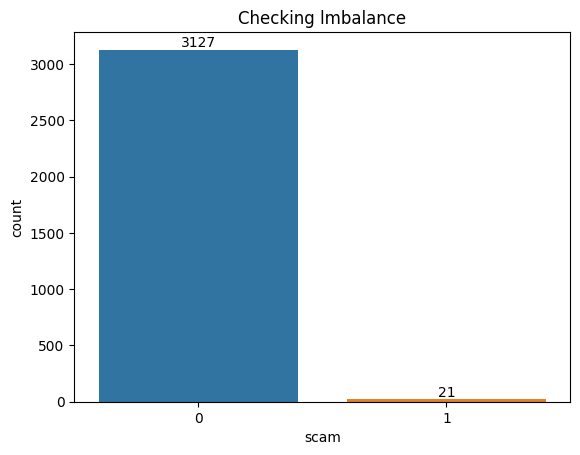

In [31]:
chgr = sns.countplot(data = lsnode_scam, x = 'scam')

for container in chgr.containers:
    chgr.bar_label(container)

plt.title('Checking lmbalance')